In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.decomposition import PCA

In [40]:
data = pd.read_parquet('assets.parquet.gzip')
data['fecha'] = pd.to_datetime(data['attributes.date'])
data['fecha_inicial'] = pd.to_datetime(data['fecha'].dt.date.min())
data['dias'] = (data['fecha'] - data['fecha_inicial']).dt.days + 1
data = data[['dias', 'symbol', 'variacion']]
data.loc[data['variacion'] == data['variacion'].max(), 'variacion'] = 0

In [55]:
pivot = data.pivot_table(index=['dias'], columns=['symbol'], values='variacion', aggfunc='mean').rename_axis(columns=None).reset_index()
pivot = pivot.fillna(0)
pivot = pivot.drop(columns=['dias'])
pivot

,FFMM-ADMINISTRADORA-10000-A,FFMM-ADMINISTRADORA-10000-B,FFMM-ADMINISTRADORA-10000-D,FFMM-ADMINISTRADORA-10000-GP,FFMM-ADMINISTRADORA-10000-I-APV,FFMM-ADMINISTRADORA-10000-S,FFMM-ADMINISTRADORA-10000-SEED,FFMM-ADMINISTRADORA-10282-A,FFMM-ADMINISTRADORA-10282-E,FFMM-ADMINISTRADORA-10282-F,...,FINV-9919-SLPX,FINV-9970-I,FINV-9970-S,FINV-9970-T,FM-FIN-CGC-A,FM-FIN-CGC-APV,FM-FIN-MBP-A,FM-FIN-MBP-APV,FM-FIN-RCN-A,FM-FIN-RCN-APV
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6437,0.003822,0.003888,0.003891,0.003918,0.003947,0.003955,0.003915,0.000093,0.000093,0.000186,...,0.000230,0.000242,0.000274,0.000274,0.004844,0.004864,1.488291e-02,0.014902,0.026970,0.026989
6438,-0.000087,0.000000,0.000000,-0.000098,-0.000082,0.000000,0.000000,0.000186,0.000093,0.000093,...,0.000230,0.000109,0.000141,0.000141,0.000016,0.000035,-5.296900e-07,0.000019,-0.000031,-0.000012
6439,-0.000087,-0.000084,0.000000,0.000000,0.000000,0.000000,0.000000,0.000093,0.000186,0.000093,...,0.000230,0.000107,0.000140,0.000140,0.000015,0.000034,-5.778439e-07,0.000019,-0.000031,-0.000012
6440,0.022849,0.022905,0.022967,0.022929,0.022934,0.022926,0.022901,0.000093,0.000093,0.000093,...,0.000231,0.000234,0.000267,0.000267,0.001572,0.001591,3.773227e-03,0.003792,0.006936,0.006955


In [56]:
#do a pca
pca = PCA(n_components=None)
pca.fit(pivot)
data_pca = pca.transform(pivot)
data_pca = pd.DataFrame(data_pca, columns=pivot.columns)
data_pca

,FFMM-ADMINISTRADORA-10000-A,FFMM-ADMINISTRADORA-10000-B,FFMM-ADMINISTRADORA-10000-D,FFMM-ADMINISTRADORA-10000-GP,FFMM-ADMINISTRADORA-10000-I-APV,FFMM-ADMINISTRADORA-10000-S,FFMM-ADMINISTRADORA-10000-SEED,FFMM-ADMINISTRADORA-10282-A,FFMM-ADMINISTRADORA-10282-E,FFMM-ADMINISTRADORA-10282-F,...,FINV-9919-SLPX,FINV-9970-I,FINV-9970-S,FINV-9970-T,FM-FIN-CGC-A,FM-FIN-CGC-APV,FM-FIN-MBP-A,FM-FIN-MBP-APV,FM-FIN-RCN-A,FM-FIN-RCN-APV
0,-1.368679,-1.710976,-1.505344,-0.479501,-0.467354,-0.219356,-0.286969,-0.171798,-0.162702,-0.164294,...,-8.810743e-24,-3.421942e-23,1.620728e-23,1.288377e-24,1.766221e-23,-4.981888e-23,-3.336390e-23,6.409607e-24,3.935135e-17,1.774355e-16
1,-1.368679,-1.710976,-1.505344,-0.479502,-0.467354,-0.219356,-0.286967,-0.171799,-0.162702,-0.164295,...,3.976241e-23,9.367782e-23,-5.202292e-23,-1.155049e-23,-2.555793e-24,6.765644e-23,3.364771e-23,-2.678383e-23,-5.350115e-17,3.296813e-18
2,-1.368679,-1.710976,-1.505344,-0.479503,-0.467354,-0.219356,-0.286966,-0.171798,-0.162702,-0.164297,...,6.330705e-23,3.537007e-23,-1.999946e-23,-1.768637e-23,-1.187308e-23,2.560018e-23,2.241685e-23,-1.817405e-23,-4.973982e-16,-7.132772e-17
3,-1.368679,-1.710976,-1.505344,-0.479500,-0.467354,-0.219356,-0.286970,-0.171797,-0.162702,-0.164293,...,1.688238e-23,-8.620694e-24,-2.890813e-23,-1.349205e-23,-1.020140e-23,4.762886e-23,1.017639e-23,2.662183e-24,-1.774004e-16,2.307962e-16
4,-1.368679,-1.710976,-1.505344,-0.479499,-0.467354,-0.219355,-0.286972,-0.171796,-0.162702,-0.164292,...,1.952627e-23,9.782408e-24,9.074351e-24,8.363584e-25,-1.953057e-23,3.908378e-23,1.108626e-23,-7.799844e-24,-3.982652e-17,1.365199e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6437,-1.368681,-1.710979,-1.503434,-0.479513,-0.467367,-0.219195,-0.283468,-0.171832,-0.148150,-0.163438,...,2.538925e-23,-4.280043e-24,1.679946e-23,1.494433e-23,7.716884e-23,-1.827977e-23,-3.243141e-23,5.219927e-23,2.116628e-15,-1.397321e-15
6438,-1.368679,-1.710976,-1.505366,-0.479501,-0.467354,-0.219184,-0.286997,-0.171798,-0.162744,-0.164181,...,3.394347e-23,2.215787e-22,-1.344741e-22,-2.543995e-23,8.330656e-24,1.345440e-22,1.086617e-22,-1.573358e-22,-2.872203e-15,1.195093e-15
6439,-1.368679,-1.710976,-1.505366,-0.479501,-0.467354,-0.219183,-0.286997,-0.171798,-0.162744,-0.164181,...,-8.233797e-24,9.361834e-23,-7.007132e-23,-5.379271e-23,6.762192e-23,8.651871e-25,7.175581e-23,-9.283929e-23,-2.338586e-15,6.526200e-16
6440,-1.368683,-1.710983,-1.503083,-0.479507,-0.467359,-0.219192,-0.284463,-0.171813,-0.159616,-0.164025,...,-1.008083e-22,-6.762768e-23,5.903312e-23,2.733954e-23,3.781634e-23,-2.857946e-23,6.110870e-24,1.123283e-23,-1.030443e-15,-7.966758e-16


In [58]:
explained_variance = pd.DataFrame(pca.explained_variance_ratio_, columns=['explained_variance'])
explained_variance['cumulative'] = explained_variance['explained_variance'].cumsum()
explained_variance.head(50)

,explained_variance,cumulative
0,3.251246e-01,0.325125
1,3.246678e-01,0.649792
2,3.013738e-01,0.951166
3,1.049926e-02,0.961665
4,9.719647e-03,0.971385
5,6.475511e-03,0.977861
6,5.498507e-03,0.983359
7,3.973137e-03,0.987332
8,3.252061e-03,0.990584
9,3.241509e-03,0.993826


In [60]:
from sklearn.decomposition import PCA

# Suponiendo que X es tu DataFrame original
X = pivot.copy()
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X)

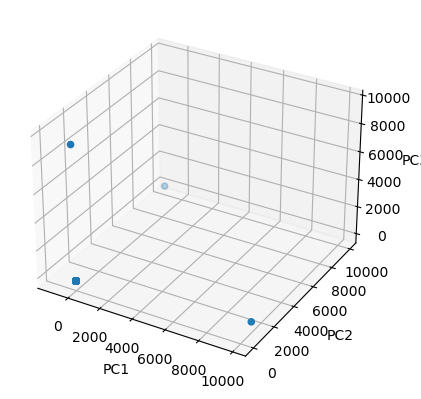

In [61]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

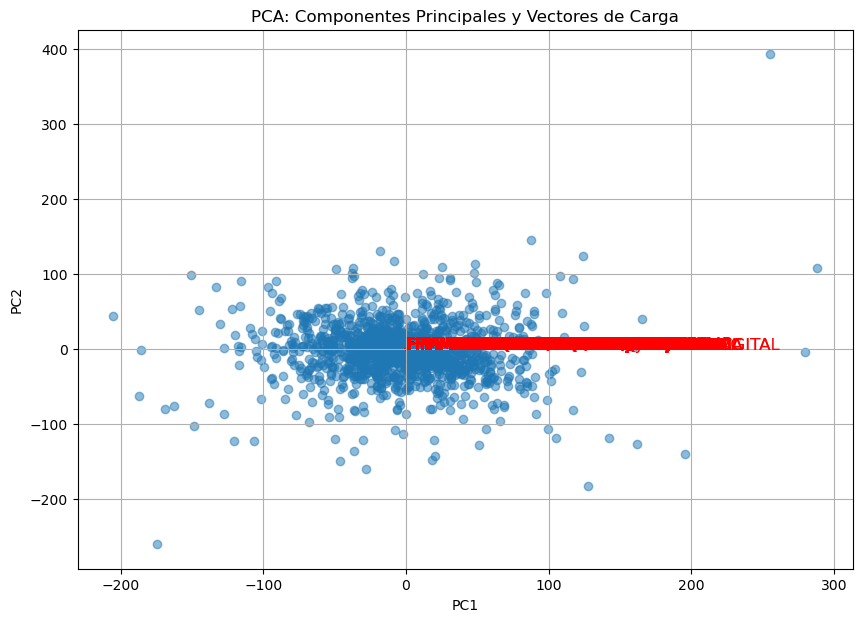

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Supongamos que X es tu DataFrame original
# Normaliza los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplica PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Cargar el DataFrame con nombres de las características
features = X.columns

# Graficar los datos
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)

# Graficar los vectores de carga
for i in range(len(features)):
    plt.arrow(0, 0, pca.components_[0, i] * 10, pca.components_[1, i] * 10,
              head_width=0.05, head_length=0.1, fc='r', ec='r')
    plt.text(pca.components_[0, i] * 10, pca.components_[1, i] * 10, features[i],
             color='r', fontsize=12)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA: Componentes Principales y Vectores de Carga')
plt.grid(True)
plt.show()
